In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords

In [71]:
df = pd.read_csv("data/train.csv")
df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36765 entries, 0 to 36764
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   discourse_id             36765 non-null  object
 1   essay_id                 36765 non-null  object
 2   discourse_text           36765 non-null  object
 3   discourse_type           36765 non-null  object
 4   discourse_effectiveness  36765 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


In [73]:
df.describe()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
count,36765,36765,36765,36765,36765
unique,36765,4191,36691,7,3
top,e35c487abf6a,900A879708F0,Summer projects should be student-designed,Evidence,Adequate
freq,1,23,14,12105,20977


In [74]:
df = df.drop_duplicates(subset ="discourse_text")
df.describe()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
count,36691,36691,36691,36691,36691
unique,36691,4191,36691,7,3
top,e35c487abf6a,91B1F82B2CF1,i feel that the lesson plans have worked for o...,Evidence,Adequate
freq,1,23,1,12104,20912


C:\Users\e175932\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='discourse_effectiveness', ylabel='count'>

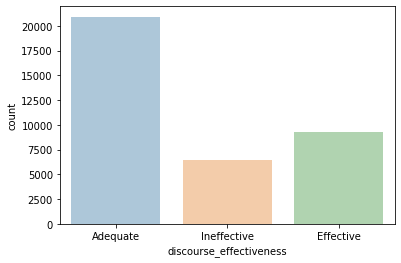

In [75]:
sns.countplot(df['discourse_effectiveness'], alpha = 0.4)

In [76]:
df["discourse_text"][1]

"On my perspective, I think that the face is a natural landform because I dont think that there is any life on Mars. In these next few paragraphs, I'll be talking about how I think that is is a natural landform "

In [77]:
df.isna().sum()

discourse_id               0
essay_id                   0
discourse_text             0
discourse_type             0
discourse_effectiveness    0
dtype: int64

In [78]:
df['discourse_type'].value_counts()

Evidence                12104
Claim                   11953
Position                 3980
Concluding Statement     3350
Lead                     2289
Counterclaim             1771
Rebuttal                 1244
Name: discourse_type, dtype: int64

In [79]:
# from sklearn.preprocessing import OneHotEncoder
# enc=OneHotEncoder()
# enc_data=pd.DataFrame(enc.fit_transform(df['discourse_type']).toarray())
# df=data.join(enc_data)
# print(df.shape)
# df.head()


In [80]:
# #One hot encode discourse_type

# type_dummies = pd.get_dummies(df['discourse_type'])
# df = pd.concat([df.drop(columns='discourse_type'), type_dummies], axis=1)

#label
df['label'] = df['discourse_effectiveness'].apply(lambda x: 2 if x == 'Effective' else 1 if x == 'Adequate'else 0)
df = df.drop(columns='discourse_effectiveness')
df = df.drop(columns='essay_id')
df.head()

,discourse_id,discourse_text,discourse_type,label
0,0013cc385424,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,1
1,9704a709b505,"On my perspective, I think that the face is a ...",Position,1
2,c22adee811b6,I think that the face is a natural landform be...,Claim,1
3,a10d361e54e4,"If life was on Mars, we would know by now. The...",Evidence,1
4,db3e453ec4e2,People thought that the face was formed by ali...,Counterclaim,1


In [81]:
#train_text_split
df_train, df_test = train_test_split(df, test_size=0.2)
print(df_train.shape, df_test.shape)

(29352, 4) (7339, 4)


In [82]:
df.columns

Index(['discourse_id', 'discourse_text', 'discourse_type', 'label'], dtype='object')

In [83]:
# vec = TfidfVectorizer()
# dense_x = vec.fit_transform(df_train['discourse_text']).todense()
# cols_x = vec.get_feature_names()
# y_train = df_train['label']
# df_train = df_train.drop(['discourse_text', 'label'],axis=1)
# X_train = df_train.join(pd.DataFrame(dense_x, columns=cols_x))

# dense_y = vec.transform(df_test['discourse_text']).todense()
# cols_y = vec.get_feature_names()
# y_test = df_test['label']
# df_test = df_test.drop(['discourse_text', 'label'],axis=1)
# X_test = df_test.join(pd.DataFrame(dense_y, columns=cols_y))

# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [84]:
vectorize = TfidfVectorizer()
X_train = vectorize.fit_transform(df_train['discourse_text'])
y_train = df_train['label']

X_test = vectorize.transform(df_test['discourse_text'])
y_test = df_test['label']

test = pd.read_csv("data/test.csv")
X_test2 = vectorize.transform(test['discourse_text'])

print(X_train.shape, X_test.shape)

(29352, 24600) (7339, 24600)


In [85]:
# a = df_train[['Claim', 'Concluding Statement', 'Counterclaim', 'Evidence', 'Lead', 'Position', 'Rebuttal']].reset_index()
# b=  df_test[['Claim', 'Concluding Statement', 'Counterclaim', 'Evidence', 'Lead', 'Position', 'Rebuttal']].reset_index()
# X_train = X_train.join(a)
# X_test = X_test.join(b)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [86]:
# X_train[[ 'Claim', 'Concluding Statement', 'Counterclaim', 'Evidence', 'Lead', 'Position', 'Rebuttal' ]] = df_train[[  'Claim', 'Concluding Statement', 'Counterclaim', 'Evidence', 'Lead', 'Position', 'Rebuttal' ]]
# X_test[[  'Claim', 'Concluding Statement', 'Counterclaim', 'Evidence', 'Lead', 'Position', 'Rebuttal' ]] = df_test[[  'Claim', 'Concluding Statement', 'Counterclaim', 'Evidence', 'Lead', 'Position', 'Rebuttal' ]]
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [87]:
#logsitic regression

glm = LogisticRegression()
glm.fit(X_train, y_train)
pred1 = glm.predict(X_test)
p_pred1 = glm.predict_proba(X_test)
print(metrics.confusion_matrix(y_test, pred1, normalize='true'))
print(metrics.classification_report(y_test, pred1))
print("AUC: ", metrics.roc_auc_score(y_test, p_pred1, multi_class='ovo'))

[[0.17094017 0.8018648  0.02719503]
 [0.04014252 0.86199525 0.09786223]
 [0.00814332 0.49022801 0.50162866]]
              precision    recall  f1-score   support

           0       0.54      0.17      0.26      1287
           1       0.65      0.86      0.74      4210
           2       0.67      0.50      0.58      1842

    accuracy                           0.65      7339
   macro avg       0.62      0.51      0.53      7339
weighted avg       0.64      0.65      0.62      7339

AUC:  0.76994150321165


C:\Users\e175932\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
p_pred1

array([[0.36048446, 0.57681214, 0.06270341],
       [0.06794291, 0.61600198, 0.31605511],
       [0.18313745, 0.6694649 , 0.14739766],
       ...,
       [0.71345518, 0.23700968, 0.04953514],
       [0.11337615, 0.47697551, 0.40964834],
       [0.02496411, 0.24434942, 0.73068647]])

the performance result is slightly decrease

In [89]:
#Randome Forest
rf = RandomForestClassifier( )
rf.fit(X_train,y_train)
print(rf.score(X_test, y_test))
pred3 = rf.predict(X_test)
p_pred3 = rf.predict_proba(X_test)
print("AUC: ", metrics.roc_auc_score(y_test, p_pred3, multi_class='ovo'))
print(metrics.classification_report(y_test, pred3))

0.6349638915383568
AUC:  0.7507398218295763
              precision    recall  f1-score   support

           0       0.62      0.05      0.10      1287
           1       0.62      0.96      0.75      4210
           2       0.79      0.30      0.43      1842

    accuracy                           0.63      7339
   macro avg       0.68      0.44      0.43      7339
weighted avg       0.66      0.63      0.56      7339



In [90]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error
  
clf = xgb.XGBClassifier(
    n_jobs = 1,
    objective = 'multi:prob',
    silent=1,
    tree_method='approx'
)   
clf.fit(X_train, y_train)
pred4 = clf.predict(X_test)
p_pred4 =clf.predict_proba(X_test)
print("AUC: ", metrics.roc_auc_score(y_test, p_pred4, multi_class='ovo'))
print(metrics.classification_report(y_test, pred4))

[19:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


AUC:  0.7573782963216246
              precision    recall  f1-score   support

           0       0.58      0.11      0.19      1287
           1       0.64      0.91      0.75      4210
           2       0.70      0.42      0.52      1842

    accuracy                           0.64      7339
   macro avg       0.64      0.48      0.49      7339
weighted avg       0.64      0.64      0.59      7339



### Predict and submit

In [91]:
# test = pd.read_csv("data/test.csv")
# print(test.shape)
# test.head()
# X_test = vectorize.transform(test['discourse_text'])

In [92]:
# #One hot encode discourse_type
# type1 = pd.get_dummies(test['discourse_type'])
# test = pd.concat([test.drop(columns='discourse_type'), type1], axis=1)
# test.shape

In [93]:
# X_test = vectorize.transform(test['discourse_text'])

In [94]:
pred5 = clf.predict(X_test2)
p_pred5 =clf.predict_proba(X_test2)


In [106]:
p_pred5[:,0]

array([[0.01722361, 0.6476574 , 0.33511898],
       [0.06035877, 0.58819544, 0.35144576],
       [0.08856506, 0.64370364, 0.2677313 ],
       [0.17227392, 0.5591429 , 0.26858318],
       [0.18245263, 0.6400053 , 0.17754205],
       [0.02085855, 0.25147155, 0.72766984],
       [0.05060102, 0.3100068 , 0.6393922 ],
       [0.18344772, 0.50467664, 0.31187564],
       [0.08020022, 0.6145949 , 0.3052049 ],
       [0.00793412, 0.14702347, 0.84504235]], dtype=float32)

In [105]:
p_pred5[:,1]

array([0.6476574 , 0.58819544, 0.64370364, 0.5591429 , 0.6400053 ,
       0.25147155, 0.3100068 , 0.50467664, 0.6145949 , 0.14702347],
      dtype=float32)

In [107]:
submission = pd.DataFrame()
submission['discourse_id'] = test['discourse_id']
submission['Ineffective'] = p_pred5[:,0]
submission['Adequate'] = p_pred5[:,1]
submission['Effective'] = p_pred5[:,2]
submission.to_csv("submission_xgboost1")